In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##from pyspark.sql import functions as F
##from pyspark.sql import types as T

### Readind Table 1

In [2]:
df1 = pd.read_csv("case_study1.csv")

In [3]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


### Readind Table 2

In [4]:
df2 = pd.read_csv("case_study2.csv")

In [5]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,delinquent_flag,30_DPD_F3M,BOUNCE_F3M
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,13.333,1,0,PL,PL,Yes,0,1
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,No,0,0
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,5741.667,1,0,ConsumerLoan,others,Yes,0,0
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,9.900,0,0,others,others,No,0,1
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,-99999.000,0,0,AL,AL,No,0,1


In [6]:
print(df1['PROSPECTID'].count());
print(df1['PROSPECTID'].nunique())

51336
51336


In [7]:
print(df2['PROSPECTID'].count());
print(df2['PROSPECTID'].nunique())

51336
51336


### Merging both tables with Primary Key

In [8]:
df= pd.merge(df1,df2, how = 'inner')

In [9]:
print(df['PROSPECTID'].count());
print(df['PROSPECTID'].nunique())

51336
51336


In [10]:
df= pd.DataFrame(df)

In [11]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,delinquent_flag,30_DPD_F3M,BOUNCE_F3M
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,13.333,1,0,PL,PL,Yes,0,1
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,No,0,0
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,5741.667,1,0,ConsumerLoan,others,Yes,0,0
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0.0,0.0,9.900,0,0,others,others,No,0,1
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,-99999.000,0,0,AL,AL,No,0,1


### Creating Summary of all the Columns

In [12]:

#creating a quick summary of the data
def summary(df,cols):
    df_summary = pd.DataFrame()
    for col in cols:
        #print (col)
        tmp =  {'FieldName'       : [col]
               ,'datatype'        : [df[col].dtype]
               ,'Row_count(not_NAN)' :[df[col].count()]
               ,'NoOfUniqueLabels': [df[col].nunique()]
               ,'CountOfNA\'s'    : [df[col].isnull().sum()]
               ,'SumOfZeros'      : [df[col].size - np.count_nonzero(df[col])] 
             # ,'Mode'            : df[col].mode().tolist()[0] if df[col].dtype in ['object','O','<M8[ns]'] and df[col].mode().tolist() <> [] else np.nan                          
               ,'Mean'            : [np.mean(df[col])] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan 
               ,'StandardDev'     : [np.std(df[col])] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan
               ,'Min'             : [df[col].min()] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan
               ,'Perc1'           : [np.nanpercentile(df[col], 1)] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan
               ,'Perc25th'        : [np.nanpercentile(df[col], 25)] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan
               ,'Median'          : [np.nanmedian(df[col])] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan
               ,'Perc75th'        : [np.nanpercentile(df[col], 75)] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan
               ,'Perc90th'        : [np.nanpercentile(df[col], 90)] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan
               ,'Perc95th'        : [np.nanpercentile(df[col], 95)] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan
               ,'Perc99th'        : [np.nanpercentile(df[col], 99)] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan
               ,'Max'             : [df[col].max()] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan
               ,'LowerOutlier'    : [np.nanpercentile(df[col], 25) - 1.5*np.subtract(*np.nanpercentile(df[col], [75, 25]))] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan
               ,'UpperOutlier'    : [np.nanpercentile(df[col], 75) + 1.5*np.subtract(*np.nanpercentile(df[col], [75, 25]))] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan
               ,'Lower_mod_Outlier':[np.min([np.nanpercentile(df[col], 1),np.nanpercentile(df[col], 25) - 1.5*np.subtract(*np.nanpercentile(df[col], [75, 25]))])] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan
               ,'Upper_mod_Outlier':[np.max([np.nanpercentile(df[col], 99),np.nanpercentile(df[col], 75) + 1.5*np.subtract(*np.nanpercentile(df[col], [75, 25]))])] if df[col].dtype not in ['object','O','<M8[ns]'] else np.nan
               }
        tmp = pd.DataFrame(tmp)
        df_summary = df_summary.append(tmp)
        df_summary =df_summary[['FieldName','datatype','NoOfUniqueLabels','CountOfNA\'s','SumOfZeros','Mean','StandardDev','Min','Perc1','Perc25th','Median','Perc75th','Perc90th','Perc95th','Perc99th','Max','LowerOutlier','UpperOutlier','Lower_mod_Outlier','Upper_mod_Outlier']]
        #print(col)
    return (df_summary)

In [13]:
summ = summary(df,df.columns)

In [14]:
summ1= pd.DataFrame(summ)

In [15]:
summ1

,FieldName,datatype,NoOfUniqueLabels,CountOfNA's,SumOfZeros,Mean,StandardDev,Min,Perc1,Perc25th,Median,Perc75th,Perc90th,Perc95th,Perc99th,Max,LowerOutlier,UpperOutlier,Lower_mod_Outlier,Upper_mod_Outlier
0,PROSPECTID,int64,51336,0,0,25668.500000,14819.426707,1.0,514.35,12834.75,25668.5,38502.25,46202.5,48769.25,50822.65,51336.0,-25666.5,77003.5,-25666.5,77003.5
0,Total_TL,int64,107,0,0,4.858598,7.177046,1.0,1.00,1.00,2.0,5.00,11.0,17.00,34.00,235.0,-5.0,11.0,-5.0,34.0
0,Tot_Closed_TL,int64,100,0,18377,2.770415,5.941622,0.0,0.00,0.00,1.0,3.00,7.0,12.00,28.00,216.0,-4.5,7.5,-4.5,28.0
0,Tot_Active_TL,int64,32,0,8519,2.088184,2.290751,0.0,0.00,1.00,1.0,3.00,5.0,6.00,11.00,47.0,-2.0,6.0,-2.0,11.0
0,Total_TL_opened_L6M,int64,20,0,30574,0.736754,1.296704,0.0,0.00,0.00,0.0,1.00,2.0,3.00,6.00,27.0,-1.5,2.5,-1.5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,last_prod_enq2,object,6,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,first_prod_enq2,object,6,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,delinquent_flag,object,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,30_DPD_F3M,int64,2,0,49553,0.034732,0.183100,0.0,0.00,0.00,0.0,0.00,0.0,0.00,1.00,1.0,0.0,0.0,0.0,1.0


In [16]:
summ1.to_csv('Summary_1.csv')

In [17]:
summ1.sort_values('CountOfNA\'s', ascending = True)

,FieldName,datatype,NoOfUniqueLabels,CountOfNA's,SumOfZeros,Mean,StandardDev,Min,Perc1,Perc25th,Median,Perc75th,Perc90th,Perc95th,Perc99th,Max,LowerOutlier,UpperOutlier,Lower_mod_Outlier,Upper_mod_Outlier
0,PROSPECTID,int64,51336,0,0,25668.500000,14819.426707,1.0,514.35,12834.75,25668.5,38502.25,46202.5,48769.25,50822.65,51336.0,-25666.5,77003.5,-25666.5,77003.5
0,MARITALSTATUS,object,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,enq_L3m,int64,38,0,21116,-12311.784771,32858.712813,-99999.0,-99999.00,0.00,0.0,1.00,3.0,4.00,9.00,42.0,-1.5,2.5,-99999.0,9.0
0,enq_L6m,int64,55,0,15669,-12311.123987,32858.960499,-99999.0,-99999.00,0.00,1.0,2.00,5.0,7.00,14.00,66.0,-3.0,5.0,-99999.0,14.0
0,enq_L12m,int64,66,0,9373,-12310.233248,32859.294390,-99999.0,-99999.00,0.00,1.0,3.00,7.0,10.00,19.00,87.0,-4.5,7.5,-99999.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Age_Newest_TL,int64,214,0,155,-62.149525,2790.791440,-99999.0,1.00,4.00,8.0,17.00,40.0,60.00,108.00,392.0,-15.5,36.5,-15.5,108.0
0,Age_Oldest_TL,int64,295,0,21,-32.575639,2791.842417,-99999.0,2.00,14.00,33.0,64.00,100.0,134.00,183.00,392.0,-61.0,139.0,-61.0,183.0
0,Other_TL,int64,47,0,28901,1.089762,2.417472,0.0,0.00,0.00,0.0,1.00,3.0,5.00,11.00,80.0,-1.5,2.5,-1.5,11.0
0,30_DPD_F3M,int64,2,0,49553,0.034732,0.183100,0.0,0.00,0.00,0.0,0.00,0.0,0.00,1.00,1.0,0.0,0.0,0.0,1.0


In [18]:
summ1.sort_values('NoOfUniqueLabels', ascending = True)

,FieldName,datatype,NoOfUniqueLabels,CountOfNA's,SumOfZeros,Mean,StandardDev,Min,Perc1,Perc25th,Median,Perc75th,Perc90th,Perc95th,Perc99th,Max,LowerOutlier,UpperOutlier,Lower_mod_Outlier,Upper_mod_Outlier
0,BOUNCE_F3M,int64,2,0,38889,0.242461,0.428572,0.0,0.00,0.000,0.000,0.00000,1.0,1.000,1.0000,1.0,0.000000,0.000000,0.000000,1.000000
0,delinquent_flag,object,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,GL_Flag,int64,2,0,48621,0.052887,0.223808,0.0,0.00,0.000,0.000,0.00000,0.0,1.000,1.0000,1.0,0.000000,0.000000,0.000000,1.000000
0,HL_Flag,int64,2,0,37418,0.271116,0.444536,0.0,0.00,0.000,0.000,1.00000,1.0,1.000,1.0000,1.0,-1.500000,2.500000,-1.500000,2.500000
0,PL_Flag,int64,2,0,42718,0.167874,0.373755,0.0,0.00,0.000,0.000,0.00000,1.0,1.000,1.0000,1.0,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,pct_currentBal_all_TL,float64,1529,0,11819,-139.416072,3742.577077,-99999.0,0.00,0.083,0.617,0.88800,1.0,1.032,1.2350,6327.5,-1.124500,2.095500,-1.124500,2.095500
0,time_since_recent_enq,int64,2382,0,427,-12084.842099,32946.595140,-99999.0,-99999.00,3.000,45.000,247.00000,666.0,1114.000,2198.6500,4768.0,-363.000000,613.000000,-99999.000000,2198.650000
0,time_since_recent_payment,int64,2435,0,0,-8129.961314,27749.058241,-99999.0,-99999.00,46.000,70.000,161.00000,626.0,1085.250,2275.3000,6065.0,-126.500000,333.500000,-99999.000000,2275.300000
0,max_unsec_exposure_inPct,float64,8975,0,581,-45127.943635,49795.299555,-99999.0,-99999.00,-99999.000,0.333,2.16425,7.5,13.250,33.9136,173800.0,-250000.746375,150003.910625,-250000.746375,150003.910625


In [19]:
summ1.loc[summ1['FieldName']== 'Tot_Missed_Pmnt']

,FieldName,datatype,NoOfUniqueLabels,CountOfNA's,SumOfZeros,Mean,StandardDev,Min,Perc1,Perc25th,Median,Perc75th,Perc90th,Perc95th,Perc99th,Max,LowerOutlier,UpperOutlier,Lower_mod_Outlier,Upper_mod_Outlier
0,Tot_Missed_Pmnt,int64,22,0,34089,0.546751,1.085519,0.0,0.0,0.0,0.0,1.0,2.0,2.0,5.0,34.0,-1.5,2.5,-1.5,5.0


In [20]:
# Load required Libraries
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
unique = df.nunique()


In [23]:
unique[unique.values==1]

Series([], dtype: int64)

### Listing down columns by their types

In [24]:
float_var= df.select_dtypes(include=['float64']).columns

In [25]:
int_var= df.select_dtypes(include=['int64']).columns

In [26]:
object_var= df.select_dtypes(include=['O']).columns

In [27]:
print(float_var)
print(int_var)
print(object_var)

Index(['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_active_tl',
       'pct_closed_tl', 'pct_tl_open_L12M', 'pct_tl_closed_L12M',
       'pct_of_active_TLs_ever', 'pct_opened_TLs_L6m_of_L12m',
       'pct_currentBal_all_TL', 'CC_utilization', 'PL_utilization',
       'pct_PL_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_L12m',
       'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever',
       'max_unsec_exposure_inPct'],
      dtype='object')
Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'Total_TL_opened_L12M',
       'Tot_TL_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL',
       'time_since_recent_payment', 'time_since_first_deliquency',
       'time_since_recent_deliquency', 'num_times_delinquent',
       'max_delinquency_level', 'max_recent_level_of_deliq', 'num_deliq_6mts',
       '

In [28]:
df['delinquent_flag']=df['delinquent_flag'].replace({'No': 0, 'Yes': 1})

### Univariate and Bivariate Analysis

In [29]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

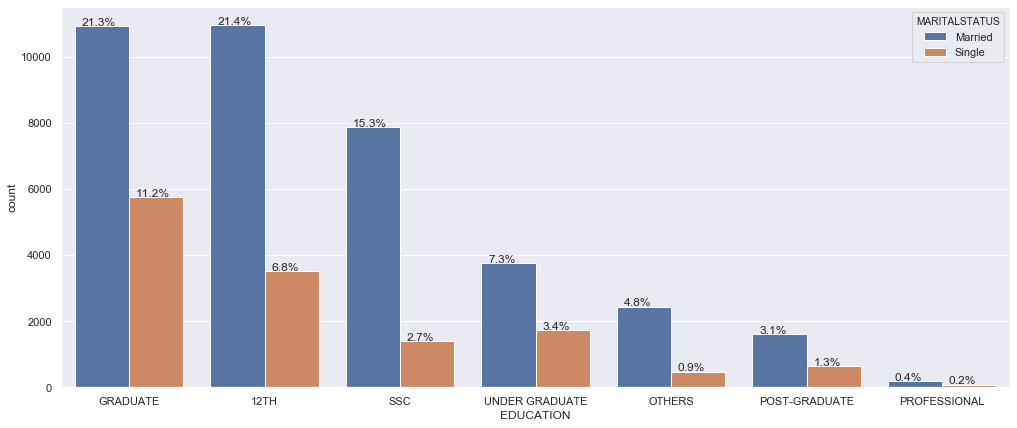

In [30]:
univariate(df=df,col='EDUCATION',vartype=1,hue='MARITALSTATUS')


/Users/pranavmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


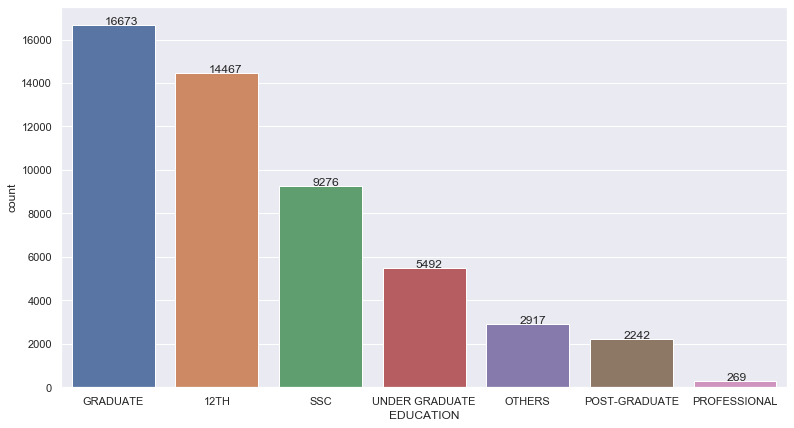

In [31]:
univariate(df=df,col='EDUCATION',vartype=1)

/Users/pranavmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


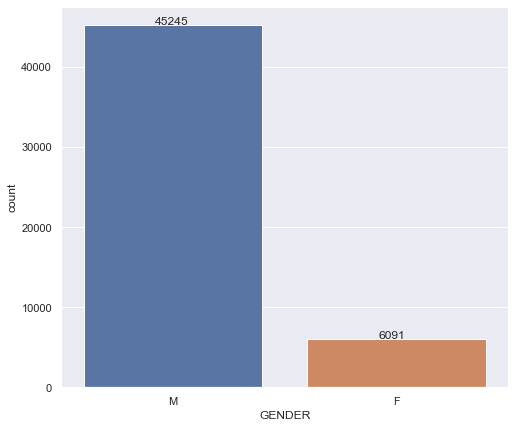

In [32]:
univariate(df=df,col='GENDER',vartype=1)

/Users/pranavmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


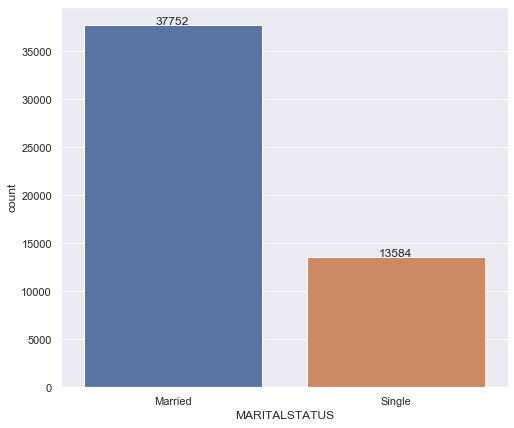

In [33]:
univariate(df=df,col='MARITALSTATUS',vartype=1)

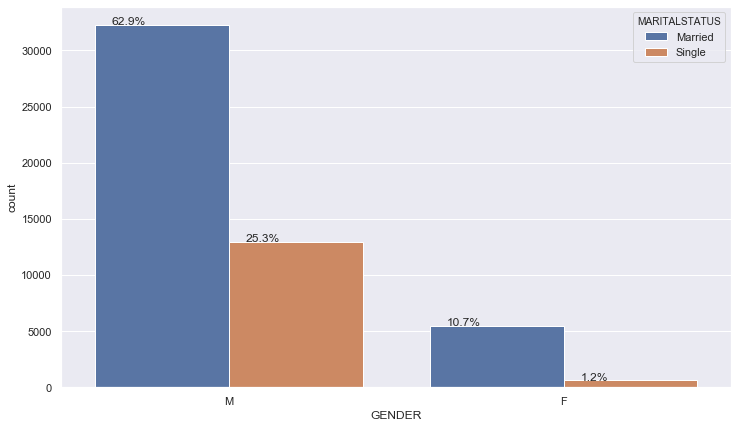

In [34]:
univariate(df=df,col='GENDER',vartype=1, hue = 'MARITALSTATUS')

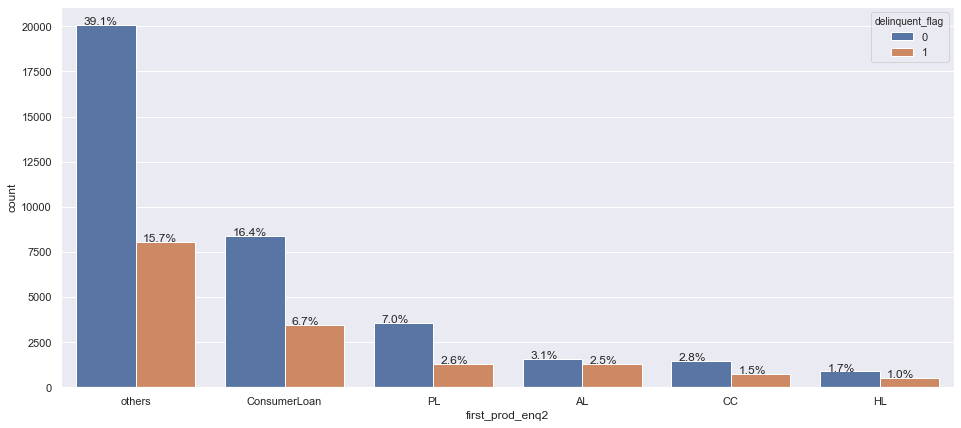

In [35]:
univariate(df=df,col='first_prod_enq2',vartype=1, hue= 'delinquent_flag')

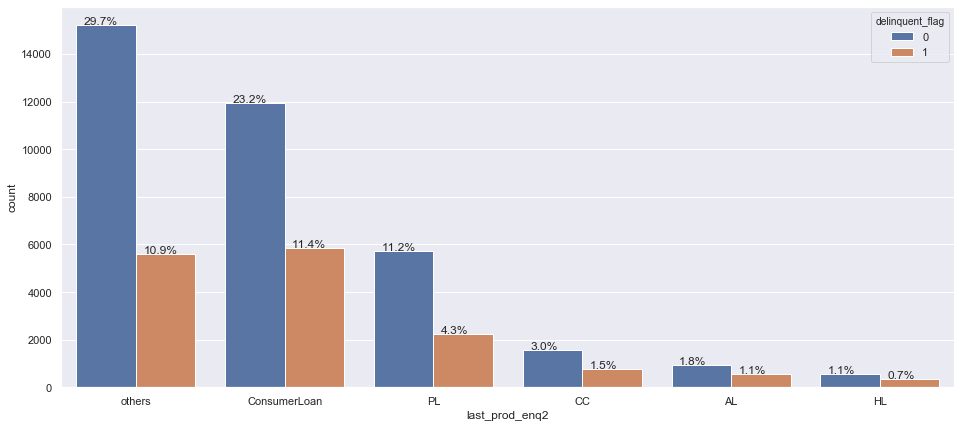

In [36]:
univariate(df=df,col='last_prod_enq2',vartype=1, hue= 'delinquent_flag')

/Users/pranavmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


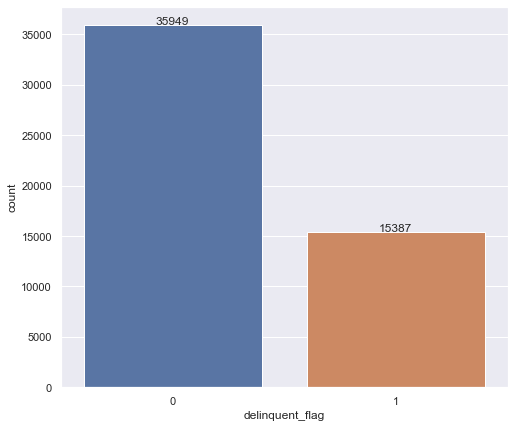

In [37]:
univariate(df=df,col='delinquent_flag',vartype=1)

/Users/pranavmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


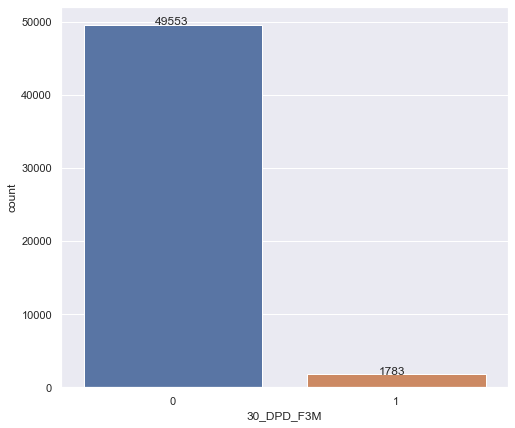

In [38]:
univariate(df=df,col='30_DPD_F3M',vartype=1)

/Users/pranavmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


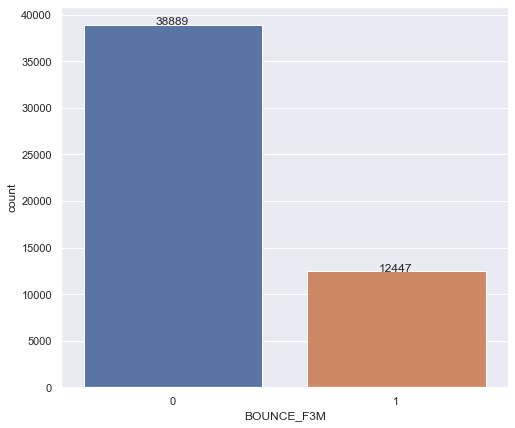

In [39]:
univariate(df=df,col='BOUNCE_F3M',vartype=1)

In [40]:
sns.set(rc={'figure.figsize':(16.5,17.5)})

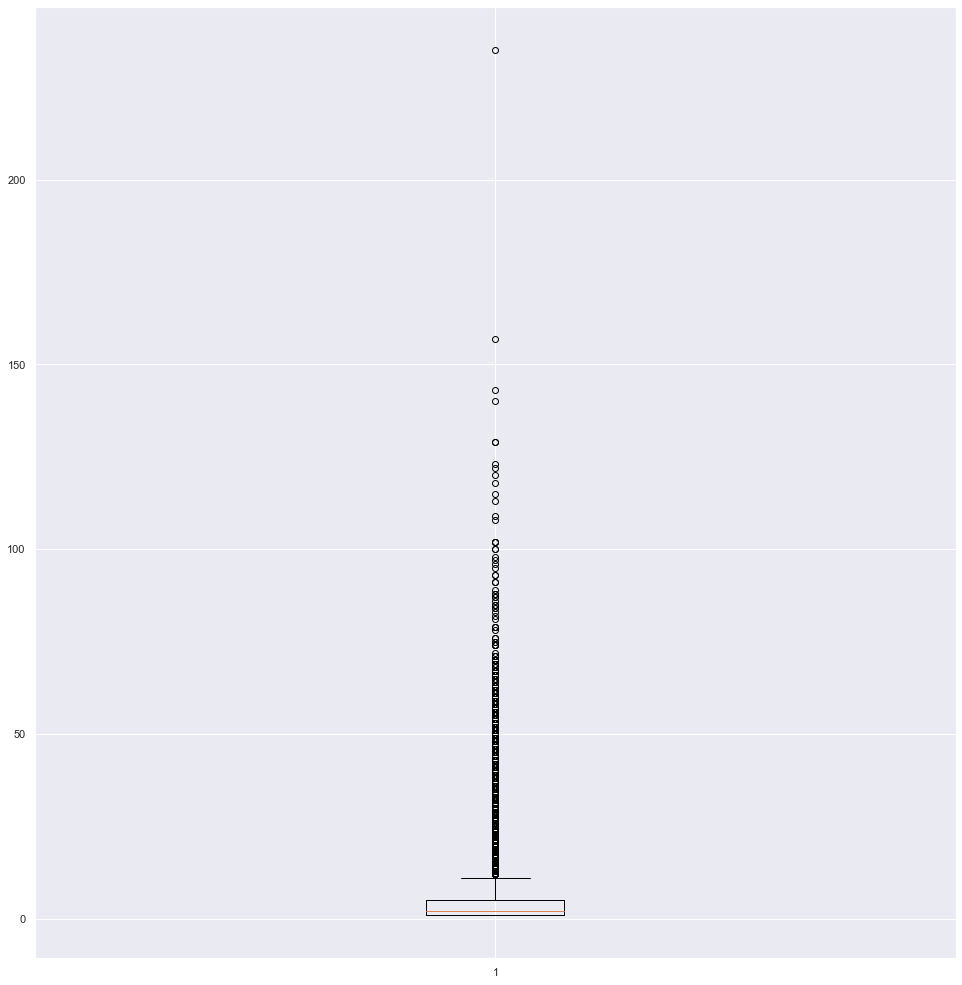

In [41]:
plt.boxplot(df["Total_TL"])
plt.show()


### Frequency Distribution

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

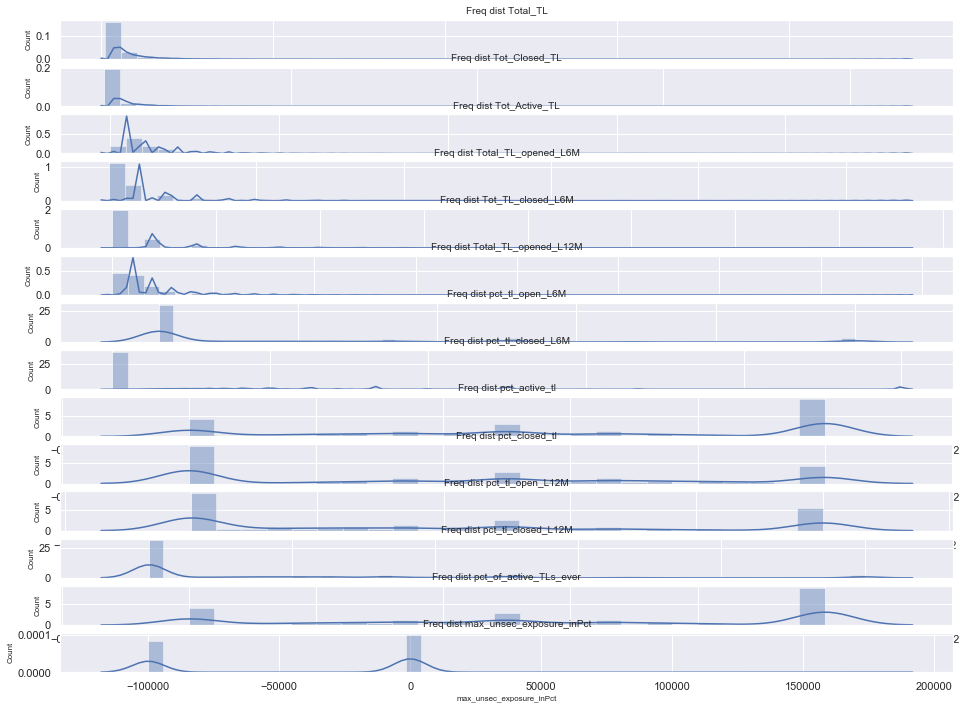

In [43]:
col_names = ['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
            'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'Total_TL_opened_L12M',
            'pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_active_tl',
            'pct_closed_tl', 'pct_tl_open_L12M', 'pct_tl_closed_L12M',
            'pct_of_active_TLs_ever', 
            'max_unsec_exposure_inPct']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [44]:
df.sample(5)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,delinquent_flag,30_DPD_F3M,BOUNCE_F3M
33533,33534,1,0,1,0,0,0.00,0.0,1.000,0.000,...,0.0,0.0,-99999.000,0,0,others,others,0,0,1
10782,10783,4,1,3,1,0,0.25,0.0,0.750,0.250,...,0.0,0.0,1.116,0,0,ConsumerLoan,others,1,0,1
34337,34338,1,1,0,0,0,0.00,0.0,0.000,1.000,...,0.0,0.0,-99999.000,0,0,others,others,0,0,0
9326,9327,2,1,1,1,0,0.50,0.0,0.500,0.500,...,0.0,0.0,0.333,0,0,ConsumerLoan,others,0,0,0
14740,14741,6,1,5,0,0,0.00,0.0,0.833,0.167,...,0.0,0.0,1.905,0,0,others,AL,1,0,0


In [45]:
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

### Split into into Train and Test by 70-30

In [46]:
train_index=list(df.sample(frac=0.7,random_state=10).index)
test_index=list(set(df.index).difference(set(train_index)))
print('Number of Train Rows are {0} and Test Rows are {1} and adding them up gives {2}'.\
      format(len(train_index),len(test_index),len(test_index)+len(train_index)))

#df['Train_Test_OOT_1']=df['Train_Test_OOT']
df.loc[train_index,'Train_Test_OOT_1']='Train_Cases'
df.loc[test_index,'Train_Test_OOT_1']='Test_Cases'

Number of Train Rows are 35935 and Test Rows are 15401 and adding them up gives 51336


### Response rate of DVs

In [47]:
#Modelling for BOUNCE_F3M
dv='BOUNCE_F3M'
df.assign(counter=1).\
groupby('Train_Test_OOT_1').\
agg({'counter':sum,
    dv:sum}).\
assign(bad_rate=lambda a: a[dv]/a['counter'])

,counter,BOUNCE_F3M,bad_rate
Train_Test_OOT_1,,,
Test_Cases,15401,3713,0.241088
Train_Cases,35935,8734,0.243050


In [48]:
#Modelling for BOUNCE_F3M
dv2='30_DPD_F3M'
df.assign(counter=1).\
groupby('Train_Test_OOT_1').\
agg({'counter':sum,
    dv2:sum}).\
assign(bad_rate=lambda a: a[dv2]/a['counter'])

,counter,30_DPD_F3M,bad_rate
Train_Test_OOT_1,,,
Test_Cases,15401,513,0.033310
Train_Cases,35935,1270,0.035342


In [49]:
df_datatypes=pd.DataFrame(df.dtypes,columns=['datatype'])
numerical_cols=df_datatypes[df_datatypes['datatype']!=object].index
numerical_cols=list(set(numerical_cols).difference(set(['PROSPECTID','30_DPD_F3M','BOUNCE_F3M'])))

#cat feats
cat_feats=df_datatypes[df_datatypes['datatype']==object].index
cat_feats=list(set(cat_feats).difference(set([ 'Train_Test_OOT_1'])))


### One hot coding for Categorical Variable

In [50]:
#One Hot Encoding the Cat variables
for feature in cat_feats:
    print(feature)
    pd.value_counts(df[feature])

MARITALSTATUS
last_prod_enq2
GENDER
EDUCATION
first_prod_enq2


In [51]:
cat_feats

['MARITALSTATUS', 'last_prod_enq2', 'GENDER', 'EDUCATION', 'first_prod_enq2']

In [52]:
for feature in cat_feats:
    print(feature)
    feature_df=df.assign(counter=1).set_index(['PROSPECTID',feature])['counter'].unstack().fillna(0)
    feature_df.columns=[feature+'_'+i for i in feature_df.columns]
    df=df.merge(feature_df,left_on='PROSPECTID',right_index=True,how='left')
    print(df.shape)
    

MARITALSTATUS
(51336, 91)
last_prod_enq2
(51336, 97)
GENDER
(51336, 99)
EDUCATION
(51336, 106)
first_prod_enq2
(51336, 112)


In [53]:
pivoted_columns=[ 'first_prod_enq2_AL',
 'first_prod_enq2_CC',
 'first_prod_enq2_ConsumerLoan',
 'first_prod_enq2_HL',
 'first_prod_enq2_PL',
 'first_prod_enq2_others',
 'MARITALSTATUS_Married',
 'MARITALSTATUS_Single',
 'GENDER_F',
 'GENDER_M',
 'last_prod_enq2_AL',
 'last_prod_enq2_CC',
 'last_prod_enq2_ConsumerLoan',
 'last_prod_enq2_HL',
 'last_prod_enq2_PL',
 'last_prod_enq2_others',
 'EDUCATION_12TH',
 'EDUCATION_GRADUATE',
 'EDUCATION_OTHERS',
 'EDUCATION_POST-GRADUATE',
 'EDUCATION_PROFESSIONAL',
 'EDUCATION_SSC',
 'EDUCATION_UNDER GRADUATE']

In [54]:
feature_list=list(set(numerical_cols).union(set(pivoted_columns)))


In [55]:
dep_var= ['BOUNCE_F3M','30_DPD_F3M']

In [56]:
Total_feature_1= list(set(feature_list).union(set(['BOUNCE_F3M','30_DPD_F3M','Train_Test_OOT_1'])))

In [57]:
#maxing x and y for train and test
dv='BOUNCE_F3M'
train_x=df.query('Train_Test_OOT_1=="Train_Cases"')[feature_list]
train_y=df.query('Train_Test_OOT_1=="Train_Cases"')[dv]
test_x=df.query('Train_Test_OOT_1=="Test_Cases"')[feature_list]
test_y=df.query('Train_Test_OOT_1=="Test_Cases"')[dv]
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(15401,)

### Principal Component Analysis

In [58]:
#performing PCA 
from sklearn.decomposition import PCA
pca = PCA()
train_x_pca = pca.fit_transform(train_x)
test_x_pca = pca.transform(test_x)


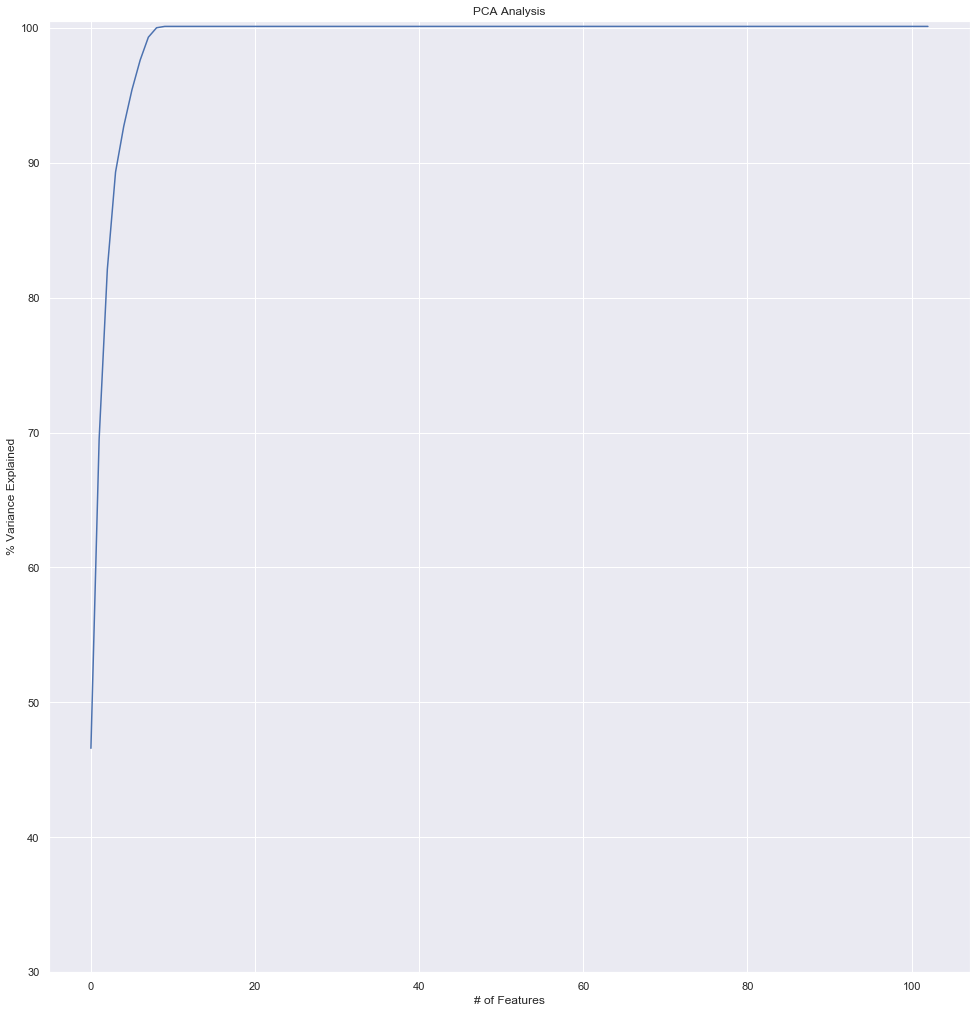

In [59]:

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [60]:
df_f= df[Total_feature_1]

### Standardisation of Variables

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pred_var_tr = [x for x in df_f.columns if x not in ['PROSPECTID', '30_DPD_F3M', 'BOUNCE_F3M','Train_Test_OOT_1']]
scaler = StandardScaler()
total_df_scaled = pd.DataFrame(scaler.fit_transform(df_f[pred_var_tr]), columns=pred_var_tr)


In [62]:
total_df_scaled['30_DPD_F3M']= df_f['30_DPD_F3M']
total_df_scaled['BOUNCE_F3M']= df_f['BOUNCE_F3M']
total_df_scaled['Train_Test_OOT_1']= df_f['Train_Test_OOT_1']

### Removing Outliers and checking the number of rows affected

In [63]:
def remove_outliers(data, real):
    mean = data.describe().iloc[1, :]
    std = data.describe().iloc[2, :]
    for (real, mean, std) in zip(real, mean, std):
        data = data[data[real] < 4*std + mean]
    return data

In [64]:
total_var = list(df1.columns) + list(df2.columns)
key_var = ['PROSPECTID']
dep_var = ['30_DPD_F3M', 'BOUNCE_F3M']
pred_var = [x for x in total_var if x not in key_var and x not in dep_var]
categorical_var = ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2', 'delinquent_flag']
numerical_var = [x for x in pred_var if x not in categorical_var]

In [65]:
total_df_scaled_v1 = remove_outliers(total_df_scaled, numerical_var).copy(deep=True)

In [66]:
total_df_scaled_v1.head()

,enq_L6m,pct_tl_closed_L12M,num_std_6mts,HL_Flag,max_deliq_12mts,Gold_TL,recent_level_of_deliq,max_deliq_6mts,pct_CC_enq_L6m_of_ever,Tot_Closed_TL,...,EDUCATION_UNDER GRADUATE,NETMONTHLYINCOME,Total_TL_opened_L12M,Tot_Active_TL,max_delinquency_level,Time_With_Curr_Empr,GL_Flag,30_DPD_F3M,BOUNCE_F3M,Train_Test_OOT_1
1,0.374666,-0.583013,-0.441078,-0.609885,0.516911,-0.290502,-0.244384,0.578918,-0.263703,-0.466272,...,-0.346118,-0.370710,-0.237665,-0.475034,-0.654234,-0.798303,-0.236305,0,0,Train_Cases
3,-2.668614,-0.583013,0.747789,-0.609885,-1.933724,-0.290502,-0.244384,-1.727027,-0.263703,-0.466272,...,-0.346118,-0.820106,-0.237665,-0.475034,-0.654234,1.779081,-0.236305,0,1,Test_Cases
4,0.374666,-0.583013,0.747789,-0.609885,-1.933724,-0.290502,-0.244384,-1.727027,-0.263703,-0.129664,...,-0.346118,-0.570442,-0.709501,-0.475034,-0.654234,-0.469555,-0.236305,0,1,Test_Cases
6,-2.668614,0.711373,2.828307,1.639653,-1.933724,0.267495,-0.244384,-1.727027,-0.263703,-0.297968,...,-0.346118,0.178550,0.234172,-0.038496,-0.654234,-0.390656,-0.236305,0,1,Test_Cases
7,0.374696,0.711373,-0.441078,-0.609885,0.516911,-0.290502,2.640657,0.578918,-0.263703,0.206944,...,2.889189,0.028752,-0.237665,-0.038496,1.530464,0.201091,-0.236305,0,0,Train_Cases


In [67]:
print(total_df_scaled.shape)
print(total_df_scaled_v1.shape)

(51336, 106)
(39745, 106)


In [68]:
from matplotlib import pyplot

### Univariate + Distribution of features before Outlier and after Outlier treatment

/Users/pranavmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


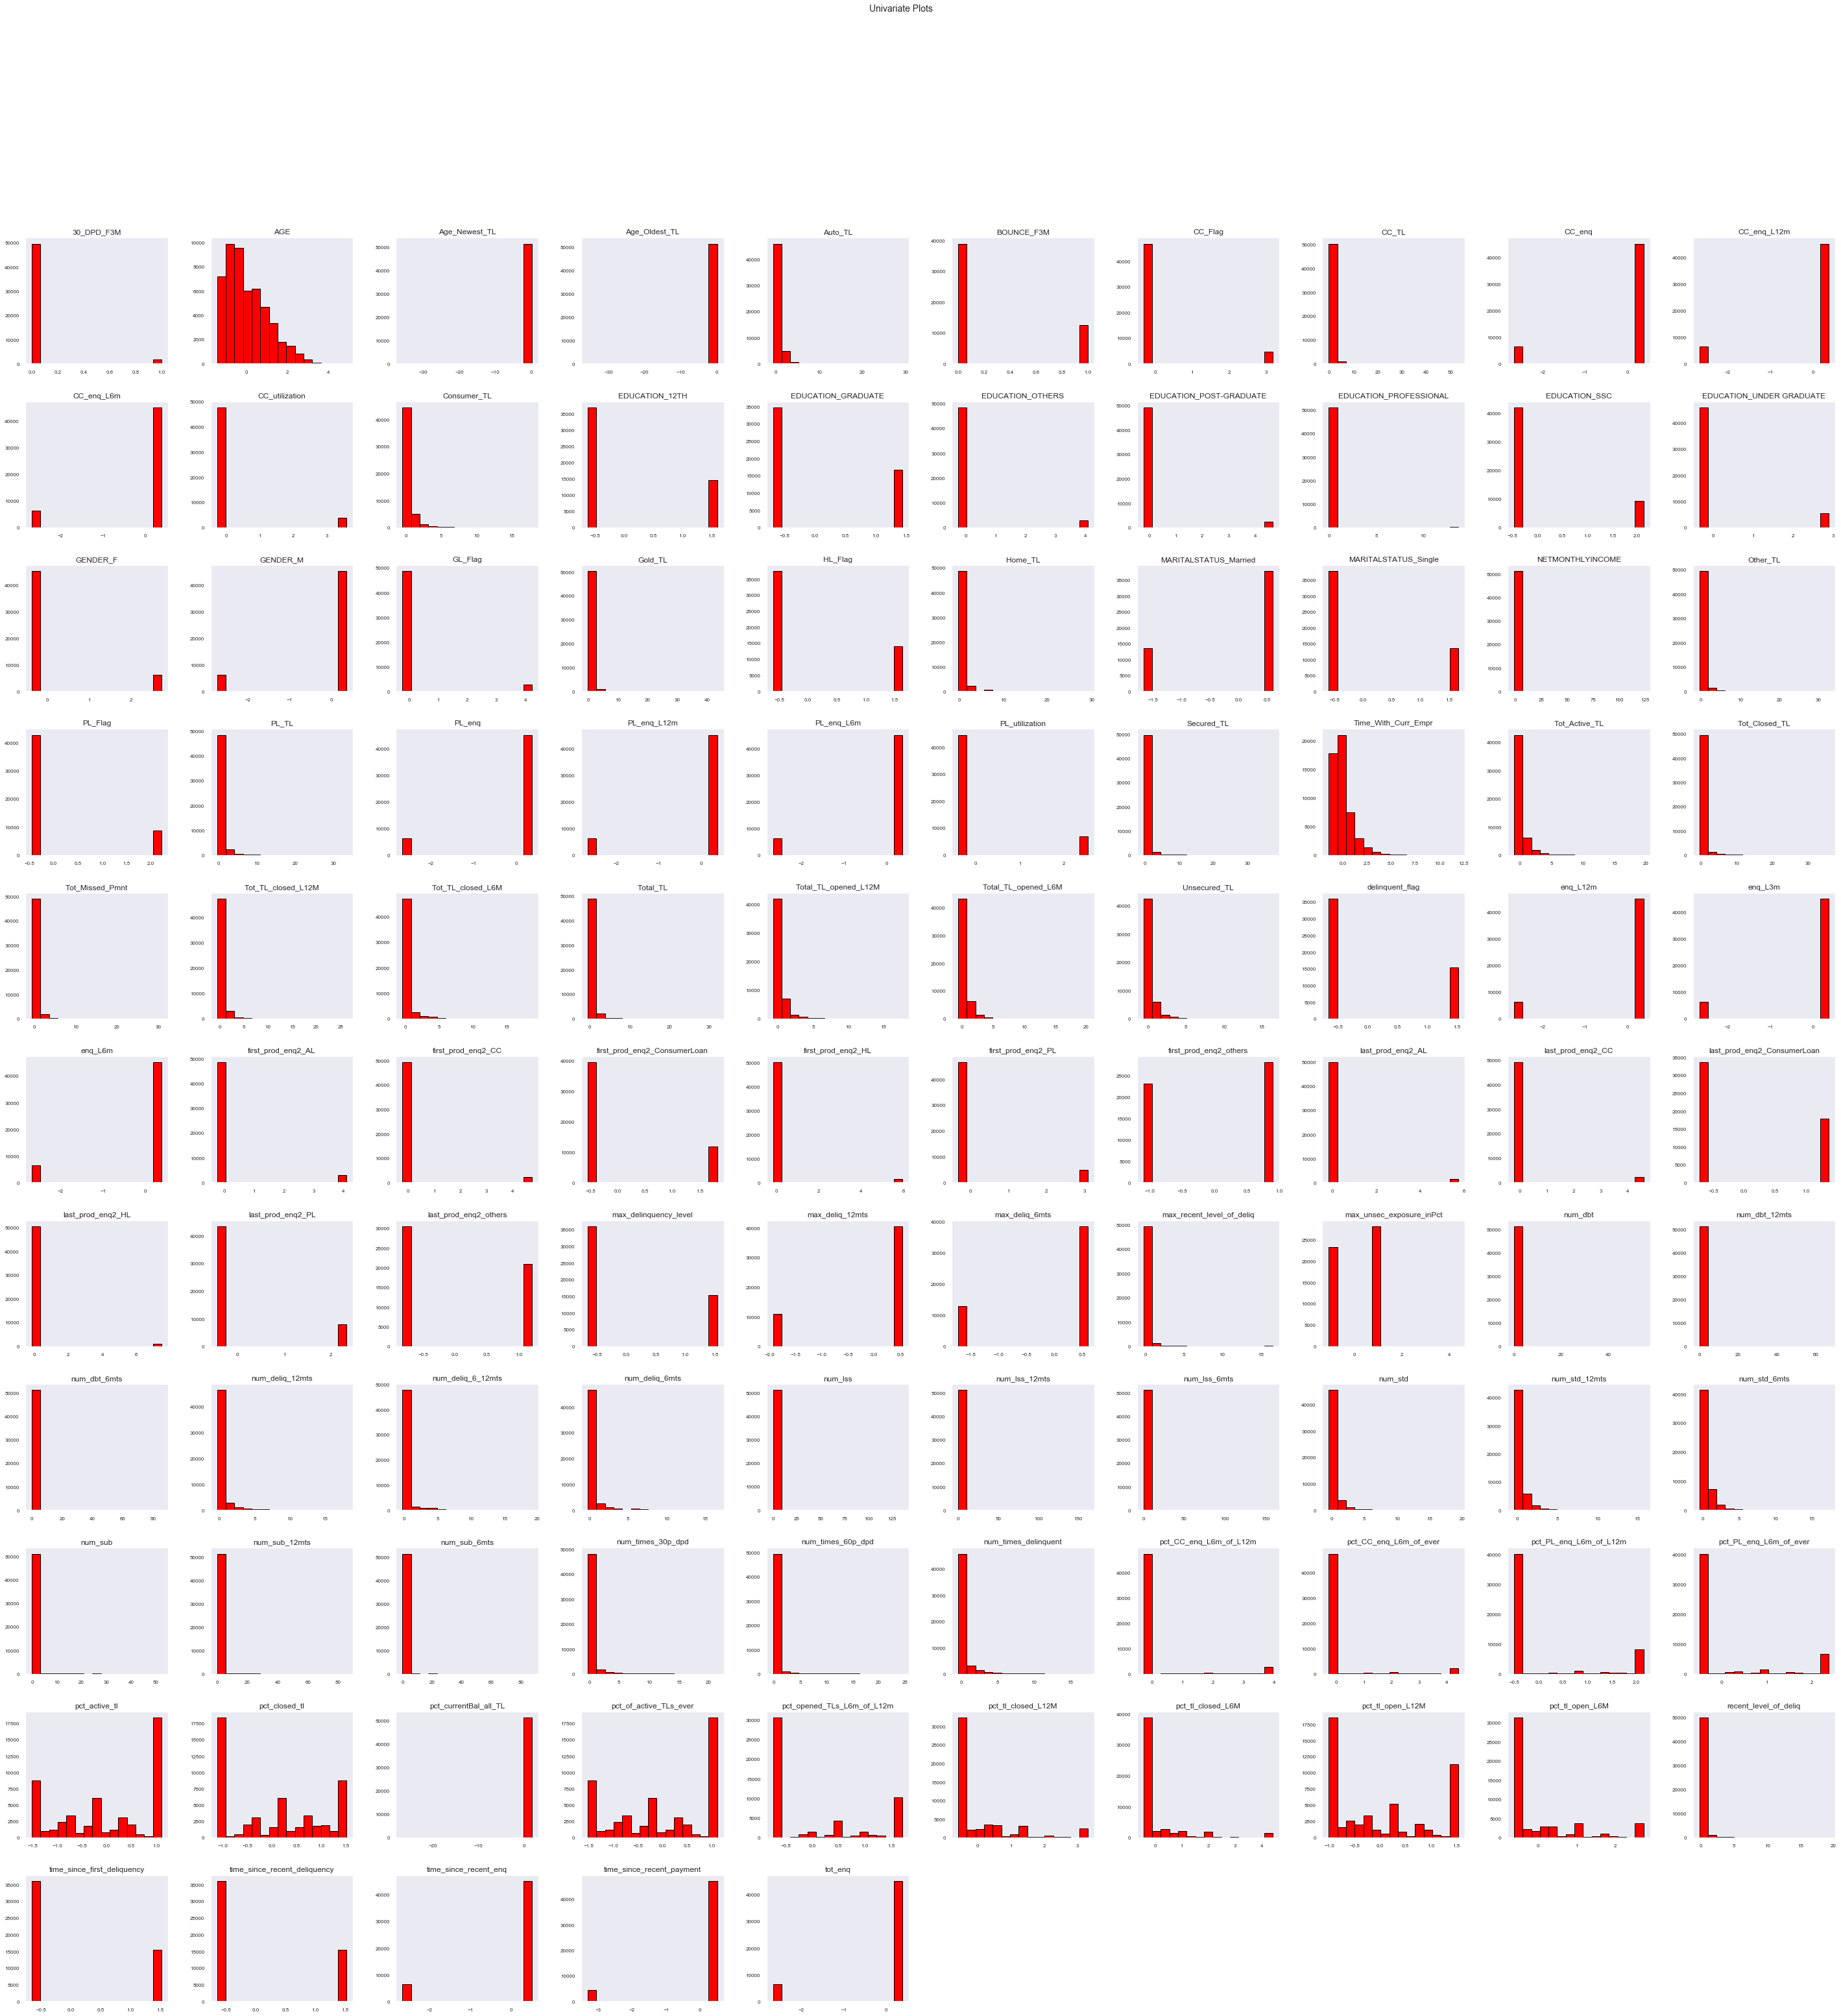

In [69]:
fig = pyplot.figure(figsize = (50,50))
ax = fig.gca()
pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
total_df_scaled.hist(ax=ax, bins=15, color='red', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)
rt = pyplot.suptitle('Univariate Plots', fontsize=14)  

/Users/pranavmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


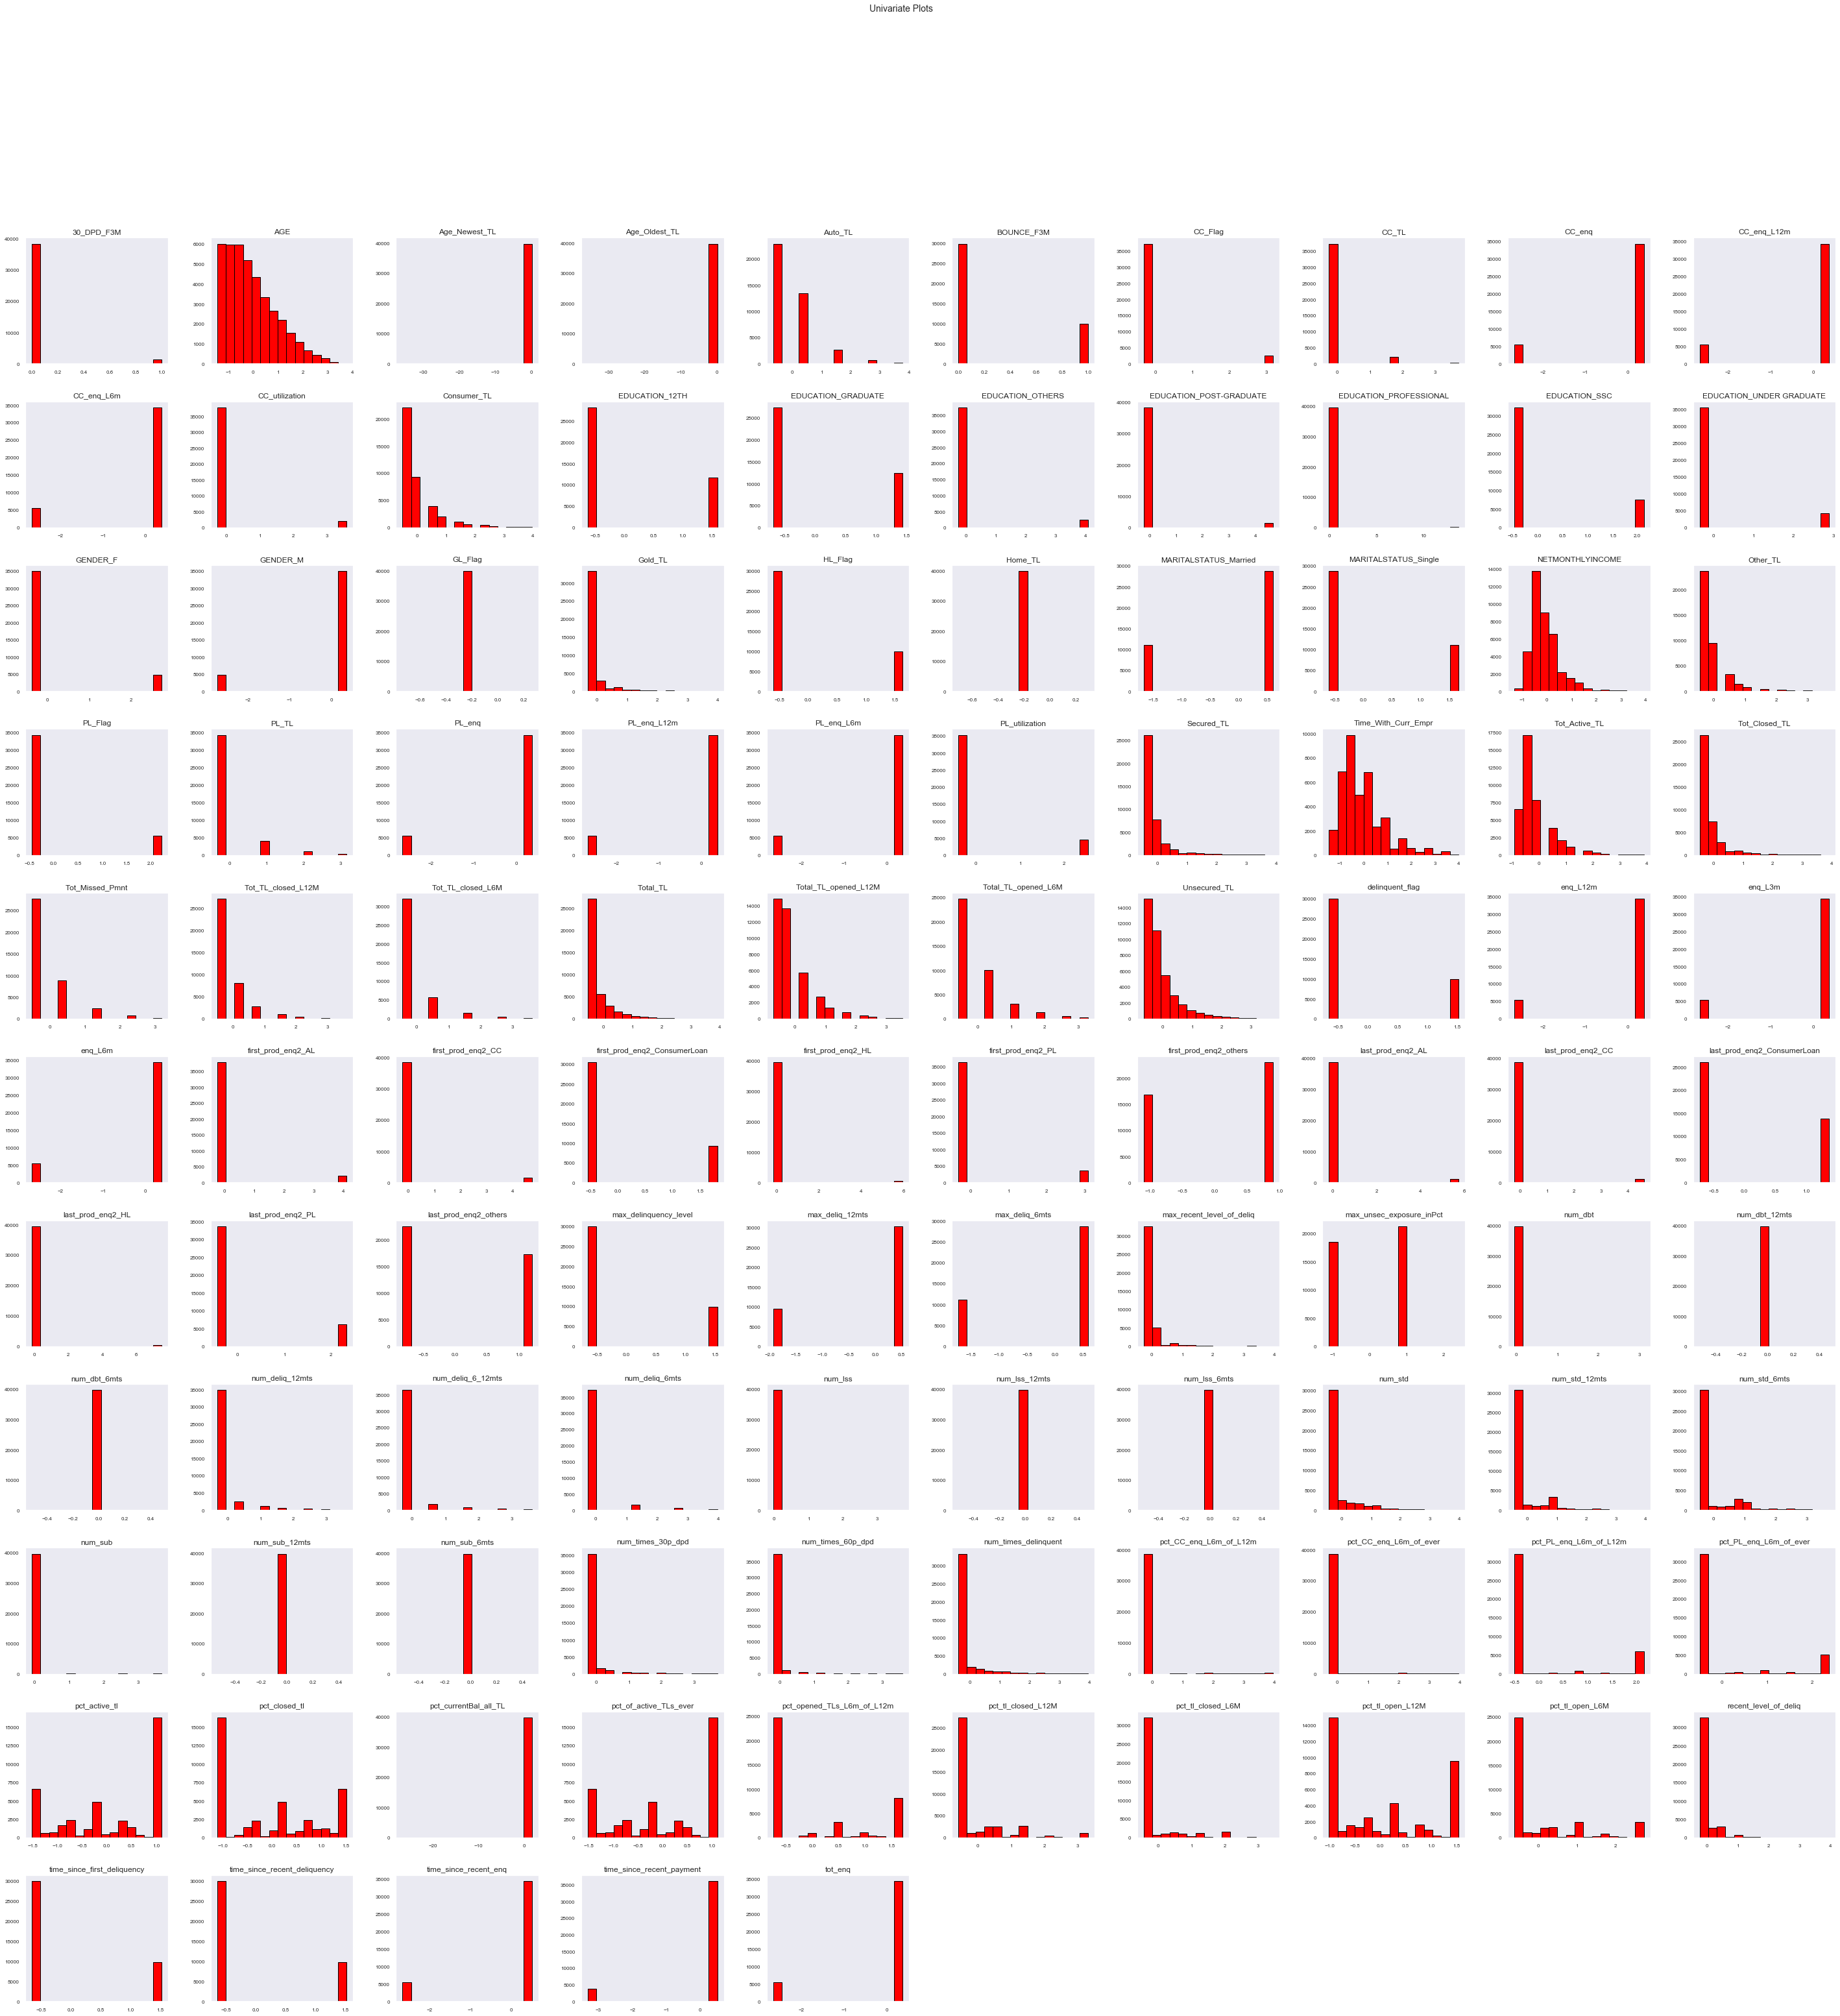

In [70]:
fig = pyplot.figure(figsize = (50,50))
ax = fig.gca()
pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
total_df_scaled_v1.hist(ax=ax, bins=15, color='red', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)
rt = pyplot.suptitle('Univariate Plots', fontsize=14)  

### Correlation Matrix

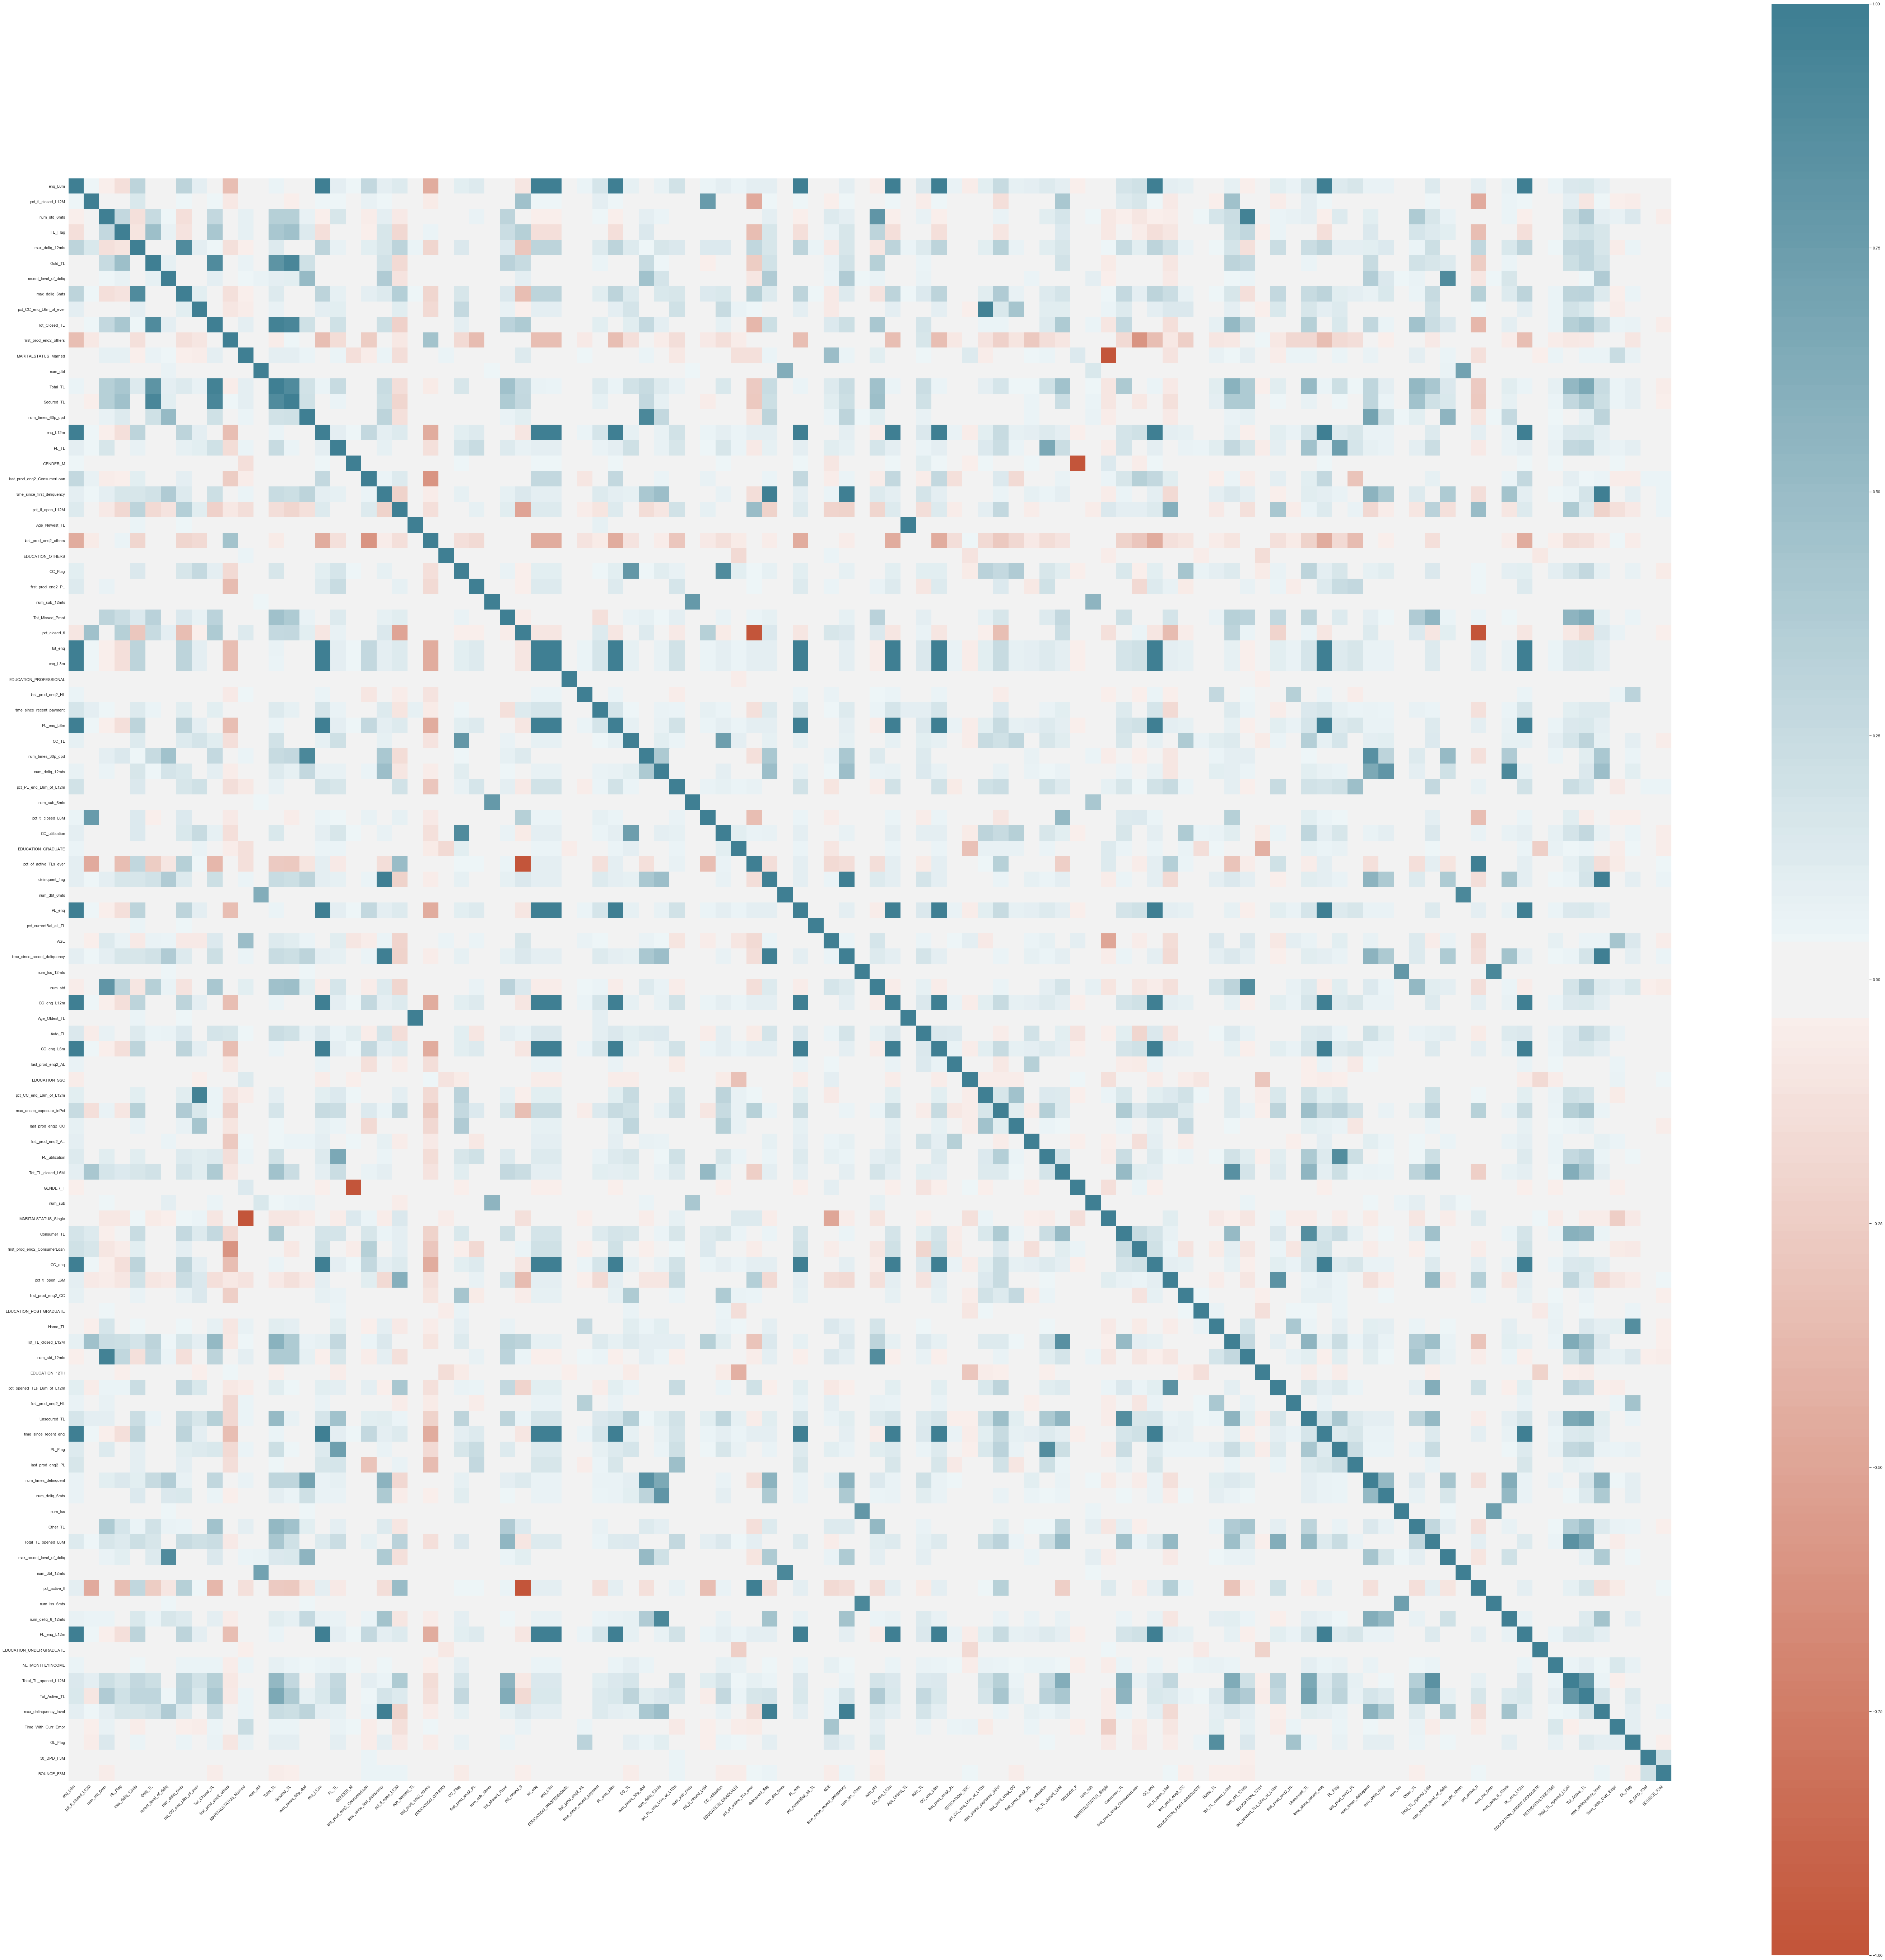

In [71]:
sns.set(rc={'figure.figsize':(100,100)})
corr = total_df_scaled.loc[:, df_f.columns != 'Train_Test_OOT_1'].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


### Model1: Logistic Regression

In [72]:
y = 'BOUNCE_F3M'
x = [x for x in total_df_scaled.columns if x not in ['PROSPECTID','30_DPD_F3M', 'BOUNCE_F3M','Train_Test_OOT_1']]
Total_feature = [x for x in total_df_scaled.columns if x not in ['PROSPECTID', '30_DPD_F3M','Train_Test_OOT_1']]

In [73]:
df_train=df_f.query('Train_Test_OOT_1=="Train_Cases"')[Total_feature]
df_test= df_f.query('Train_Test_OOT_1=="Test_Cases"')[Total_feature]

In [74]:
print(df_train.shape)
print(df_test.shape)

(35935, 104)
(15401, 104)


In [75]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(df_train[x],df_train[y])

pred_train = clf.predict(df_train[x])
pred_test = clf.predict(df_test[x])

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,df_train[y])
accuracy_test = accuracy_score(pred_test,df_test[y])



/Users/pranavmac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [76]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(df_train[y]), clf.predict_proba(df_train[x])[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(df_test[y]), clf.predict_proba(df_test[x])[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)

0.7569500486990399 0.7589117589766898 0.5548044716125661 0.5563009049544371


In [106]:
df_train_1= df_train.copy();
df_test_1= df_test.copy()

In [107]:
df_train_1['Pred']= clf.predict_proba(df_train_1[x])[:,1]
df_test_1['Pred']= clf.predict_proba(df_test_1[x])[:,1]

### KS Matrix

In [108]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [109]:
y

'BOUNCE_F3M'

In [110]:
mydf = ks(data=df_train_1,target='BOUNCE_F3M', prob='Pred')


            min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                       
1       3.415624e-01  0.495761    1118       2476     12.80%         9.10%   
2       3.074620e-01  0.341562    1041       2552     11.92%         9.38%   
3       2.775942e-01  0.307457     940       2654     10.76%         9.76%   
4       2.596837e-01  0.277589     893       2700     10.22%         9.93%   
5       2.472101e-01  0.259681     872       2721      9.98%        10.00%   
6       2.342100e-01  0.247208     880       2714     10.08%         9.98%   
7       2.195650e-01  0.234210     822       2771      9.41%        10.19%   
8       2.021116e-01  0.219564     763       2831      8.74%        10.41%   
9       1.787889e-01  0.202111     723       2870      8.28%        10.55%   
10      6.941221e-16  0.178785     682       2912      7.81%        10.71%   

       cum_eventrate cum_noneventrate   KS  
Decile            

In [111]:
mydf = ks(data=df_test_1,target='BOUNCE_F3M', prob='Pred')


        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.341022  0.492935     487       1053     13.12%         9.01%   
2       0.307282  0.341007     466       1074     12.55%         9.19%   
3       0.277685  0.307270     380       1160     10.23%         9.92%   
4       0.259302  0.277665     390       1150     10.50%         9.84%   
5       0.246244  0.259298     330       1210      8.89%        10.35%   
6       0.233613  0.246234     375       1165     10.10%         9.97%   
7       0.219936  0.233604     360       1180      9.70%        10.10%   
8       0.202267  0.219928     324       1216      8.73%        10.40%   
9       0.179349  0.202260     313       1227      8.43%        10.50%   
10      0.001261  0.179336     288       1253      7.76%        10.72%   

       cum_eventrate cum_noneventrate   KS  
Decile                                      
1             13.12% 

### Model2: XGBoost with Hyperparameter tuning

In [82]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
##from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [83]:
def modelfit(alg, dtrain, dtest, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[Target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds
                         # , show_progress=False
                         )
        alg.set_params(n_estimators=cvresult.shape[0])
    
    print('NEstimators:')
    print(cvresult.shape[0])
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[Target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Predict testing set
    dtest_predictions = alg.predict(dtest[predictors])
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[Target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[Target], dtrain_predprob))
    
    print("Accuracy : %.4g" % metrics.accuracy_score(dtest[Target].values, dtest_predictions))
    print("AUC Score (Test): %f" % metrics.roc_auc_score(dtest[Target], dtest_predprob))
    
                    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

In [84]:
DevData=df_f.query('Train_Test_OOT_1=="Train_Cases"')[Total_feature]
TestData= df_f.query('Train_Test_OOT_1=="Test_Cases"')[Total_feature]

In [85]:
Target = 'BOUNCE_F3M'

DevData.reset_index(inplace = True)
TestData.reset_index(inplace = True)

In [86]:
predictors = [x for x in DevData.columns if x not in [Target]]


In [87]:
predictors=list(set(predictors).difference(set(['index'])))

In [88]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb1, dtrain=DevData, dtest=TestData, predictors=predictors)
#modelfit(xgb1, DevData, predictors)

NEstimators:
83

Model Report
Accuracy : 0.7667
AUC Score (Train): 0.732059
Accuracy : 0.7585
AUC Score (Test): 0.626653


#### Tuning Max Depth and Min Child Weight

In [89]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(DevData[predictors],DevData[Target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_ 

/Users/pranavmac/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([ 8.27541041,  8.80801826, 11.41478386, 19.34593897, 17.23377576,
         15.54903059, 19.76996179, 19.69624367, 18.17254901, 25.94812899,
         28.16912928, 23.69622416]),
  'std_fit_time': array([0.35044172, 0.85203651, 1.51363205, 0.82287139, 1.0201259 ,
         0.42263563, 0.29599635, 0.56964242, 0.14631011, 1.55889524,
         1.08859717, 2.53260463]),
  'mean_score_time': array([0.04169364, 0.0449894 , 0.06125779, 0.07954473, 0.0675674 ,
         0.06172557, 0.08064055, 0.07502294, 0.07416348, 0.11393037,
         0.10758781, 0.08397403]),
  'std_score_time': array([0.00165033, 0.0053233 , 0.00652289, 0.00343355, 0.00358887,
         0.00357373, 0.00176578, 0.00211631, 0.00346019, 0.01068203,
         0.00645827, 0.01681935]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

In [90]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(DevData[predictors],DevData[Target])
gsearch2.cv_results_, gsearch1.best_params_, gsearch1.best_score_ 

/Users/pranavmac/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([11.22089868, 13.31905031, 15.11663685, 17.92805982, 17.93587365,
         17.66216288, 18.23542886, 19.14838033, 22.54775248]),
  'std_fit_time': array([1.02567519, 0.61714385, 0.6491824 , 0.30320672, 0.39283555,
         0.79503722, 0.39791898, 1.04324106, 2.91379351]),
  'mean_score_time': array([0.05568562, 0.06283374, 0.06667871, 0.07595329, 0.07243814,
         0.0705759 , 0.07163558, 0.0820159 , 0.08775001]),
  'std_score_time': array([0.00447015, 0.00113301, 0.00227697, 0.00332663, 0.00331388,
         0.00256881, 0.00279591, 0.00586427, 0.01718165]),
  'param_max_depth': masked_array(data=[4, 4, 4, 5, 5, 5, 6, 6, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],


#### Tunning Gamma

In [92]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,8)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(DevData[predictors],DevData[Target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

/Users/pranavmac/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([10.5269567 , 12.5147614 , 13.38479214, 14.0486516 , 12.5657773 ,
         12.64520674, 12.8268548 , 12.4552031 ]),
  'std_fit_time': array([0.67152916, 0.5648583 , 0.39310723, 0.65357985, 0.622843  ,
         1.0238369 , 0.21218021, 0.41604195]),
  'mean_score_time': array([0.05745864, 0.06517382, 0.06977243, 0.0668869 , 0.06096029,
         0.06525564, 0.06723475, 0.05285463]),
  'std_score_time': array([0.00462432, 0.00159202, 0.00297363, 0.0031256 , 0.00284772,
         0.00408295, 0.00189684, 0.00855236]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4},
   {'gamma': 0.5},
   {'gamma': 0.6},
   {'gamma': 0.7}],
  'split0_test_score': array([0.64579416, 0.64579416, 0.64579416, 0.64619621, 0.646207

In [93]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0.5,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb2, dtrain=DevData, dtest=TestData, predictors=predictors)
#modelfit(xgb1, DevData, predictors)

NEstimators:
105

Model Report
Accuracy : 0.7605
AUC Score (Train): 0.671312
Accuracy : 0.7591
AUC Score (Test): 0.629191


#### Tuning Subsample and ColSample by tree

In [94]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=3,
 min_child_weight=1, gamma=0.5, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(DevData[predictors],DevData[Target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_




/Users/pranavmac/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([ 8.24951229,  8.41697993,  8.84352827,  8.69183998, 13.50385485,
         15.64317265, 15.66591916, 14.59382176, 15.37864723, 15.14593225,
         14.55372996, 14.89857268, 16.15153399, 16.30687671, 15.92413964,
         17.63595567]),
  'std_fit_time': array([0.53795471, 0.31256302, 0.41620853, 0.60586025, 1.61633896,
         1.07464393, 0.74160237, 0.78938628, 0.99523423, 0.89291677,
         0.85137842, 0.87922503, 0.27412163, 0.69364947, 0.82955275,
         1.30415481]),
  'mean_score_time': array([0.03965893, 0.03984232, 0.04010096, 0.04630694, 0.06129241,
         0.06844821, 0.06867957, 0.06380157, 0.0620111 , 0.06227107,
         0.05869927, 0.06371455, 0.06311159, 0.06412072, 0.0639183 ,
         0.06096463]),
  'std_score_time': array([0.00269862, 0.00232248, 0.00093098, 0.00575776, 0.00150753,
         0.00489809, 0.0022653 , 0.00325455, 0.00354874, 0.00202744,
         0.00192988, 0.00195277, 0.00229529, 0.00205137, 0.00440048,
         0.012421

#### Tuning Regularization Alpha

In [95]:
param_test6 = {
 'reg_alpha':[10, 20, 30]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=92, max_depth=3,
 min_child_weight=1, gamma=0.5, subsample=0.8, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(DevData[predictors],DevData[Target])
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

/Users/pranavmac/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([3.99934039, 5.04881525, 5.58363805]),
  'std_fit_time': array([0.25179845, 0.63915974, 0.26524168]),
  'mean_score_time': array([0.03534756, 0.04620299, 0.03934259]),
  'std_score_time': array([0.0035117 , 0.00529699, 0.00420989]),
  'param_reg_alpha': masked_array(data=[10, 20, 30],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 10}, {'reg_alpha': 20}, {'reg_alpha': 30}],
  'split0_test_score': array([0.65112425, 0.64861133, 0.64822963]),
  'split1_test_score': array([0.62914997, 0.62784805, 0.62803235]),
  'split2_test_score': array([0.6306274 , 0.62835254, 0.62863343]),
  'split3_test_score': array([0.62659928, 0.62569157, 0.62394162]),
  'split4_test_score': array([0.62624508, 0.62475829, 0.62492634]),
  'mean_test_score': array([0.6327492 , 0.63105236, 0.63075268]),
  'std_test_score': array([0.00932978, 0.0088795 , 0.00891821]),
  'rank_test_score': array([1, 2, 3], dtype=int32)

### Final Model Results

In [96]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0.5,
 subsample=0.8,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 reg_alpha=10,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb4, dtrain=DevData, dtest=TestData, predictors=predictors)
#modelfit(xgb1, DevData, predictors)

NEstimators:
1000

Model Report
Accuracy : 0.7587
AUC Score (Train): 0.661677
Accuracy : 0.7588
AUC Score (Test): 0.630726


### Feature Importance

In [97]:
FeatImpMat = pd.DataFrame({'Feature': predictors,
             'Importance' : xgb4.feature_importances_})
FeatImpMat = FeatImpMat.sort_values(['Importance'], ascending=False)

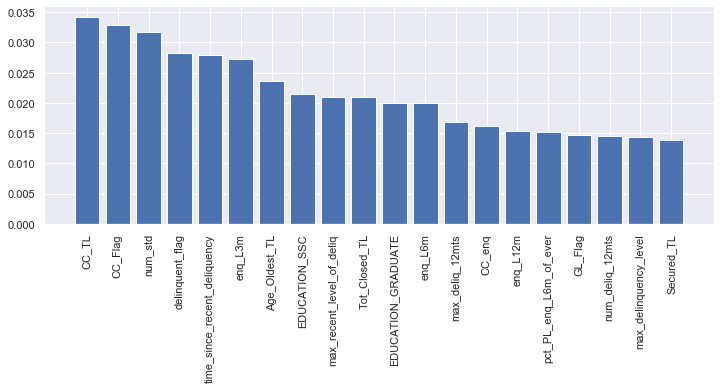

In [98]:
from matplotlib import pyplot

pyplot.bar(FeatImpMat['Feature'][:20], FeatImpMat['Importance'][:20])
pyplot.xticks(rotation = 90)
pyplot.show()

In [99]:
pred_train = xgb4.predict(DevData[predictors])
pred_test = xgb4.predict(TestData[predictors])

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,DevData[Target])
accuracy_test = accuracy_score(pred_test,TestData[Target])



In [100]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(DevData[Target]), xgb4.predict_proba(DevData[predictors])[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(TestData[Target]), xgb4.predict_proba(TestData[predictors])[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)

0.7586753861138166 0.7588468281280436 0.6616772304275274 0.6307261535353245


In [101]:
DevData_1 = DevData.copy()
TestData_1 = TestData.copy()

In [102]:
DevData_1['Pred']= xgb4.predict_proba(DevData_1[predictors])[:,1]
TestData_1['Pred']= xgb4.predict_proba(TestData_1[predictors])[:,1]

In [103]:
mydf = ks(data=DevData_1,target='BOUNCE_F3M', prob='Pred')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.351756  0.634054    1657       1937     18.97%         7.12%   
2       0.303987  0.351712    1203       2390     13.77%         8.79%   
3       0.273700  0.303985    1113       2481     12.74%         9.12%   
4       0.252920  0.273698    1008       2585     11.54%         9.50%   
5       0.235234  0.252916     910       2683     10.42%         9.86%   
6       0.217649  0.235233     810       2784      9.27%        10.23%   
7       0.198106  0.217636     688       2905      7.88%        10.68%   
8       0.175812  0.198102     555       3039      6.35%        11.17%   
9       0.146986  0.175810     467       3126      5.35%        11.49%   
10      0.049981  0.146984     323       3271      3.70%        12.03%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             18.97

In [104]:
mydf = ks(data=TestData_1,target='BOUNCE_F3M', prob='Pred')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.352324  0.594222     632        908     17.02%         7.77%   
2       0.302763  0.352280     517       1023     13.92%         8.75%   
3       0.272964  0.302747     437       1103     11.77%         9.44%   
4       0.253142  0.272963     412       1128     11.10%         9.65%   
5       0.235178  0.253142     373       1167     10.05%         9.98%   
6       0.217493  0.235165     356       1184      9.59%        10.13%   
7       0.198422  0.217478     299       1241      8.05%        10.62%   
8       0.176852  0.198415     271       1269      7.30%        10.86%   
9       0.148687  0.176815     247       1293      6.65%        11.06%   
10      0.058293  0.148596     169       1372      4.55%        11.74%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             17.02

### THE END